# 6.5 Unsuperived Machine Learning
## Index
##### 1. Import Libraries and Data
##### 2. The elbow technique
##### 3. k-means clustering


## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path=r' C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County'

In [4]:
# Import the dataset
df = pd.read_csv(r'C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County\Data\Adjusted Data\kc_house_data.csv', index_col = False) 

In [5]:
df.shape

(21613, 26)

In [6]:
df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date_of_sale,price,bedrooms,bathrooms,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price category,lat_long
0,0,0,0,0,0,7129300520,2014-10-13,221900.0,3,1.00,...,7,1180,0,1955,0,98178,47.5112,-122.257,Middle price,"(47.5112, -122.257)"
1,1,1,1,1,1,6414100192,2014-12-09,538000.0,3,2.25,...,7,2170,400,1951,1991,98125,47.7210,-122.319,High price,"(47.721, -122.319)"
2,2,2,2,2,2,5631500400,2015-02-25,180000.0,2,1.00,...,6,770,0,1933,0,98028,47.7379,-122.233,Low price,"(47.7379, -122.233)"
3,3,3,3,3,3,2487200875,2014-12-09,604000.0,4,3.00,...,7,1050,910,1965,0,98136,47.5208,-122.393,High price,"(47.5208, -122.393)"
4,4,4,4,4,4,1954400510,2015-02-18,510000.0,3,2.00,...,8,1680,0,1987,0,98074,47.6168,-122.045,High price,"(47.6168, -122.045)"


In [7]:
df.drop(['Unnamed: 0.3','yr_renovated','yr_built','zipcode','id','date_of_sale','price category','lat_long','lat','long','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace=True)

## 2. The Elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-2950874188417098.0,
 -1392908361154805.5,
 -767995355741863.0,
 -498391512758031.4,
 -361722155836486.6,
 -275125301184256.3,
 -216965458490522.88,
 -173359762042993.94,
 -147740255775624.53]

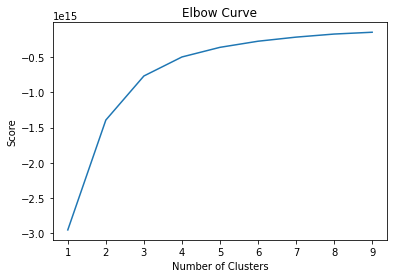

In [10]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### We can the jump between 2 and 3 on the x-axis. That means optimal count for your clusters is three.

### 3. k-means clustering

In [11]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 4) 

In [12]:
# Then fit the K-mean into the DF
kmeans.fit(df)

KMeans(n_clusters=4)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

In [14]:
df.head()

,Unnamed: 0.4,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,clusters
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,3
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,3
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0


In [15]:
# Verify if the clusters we correctly assigned with a general view
df['clusters'].value_counts()

0    12934
3     7260
1     1229
2      190
Name: clusters, dtype: int64

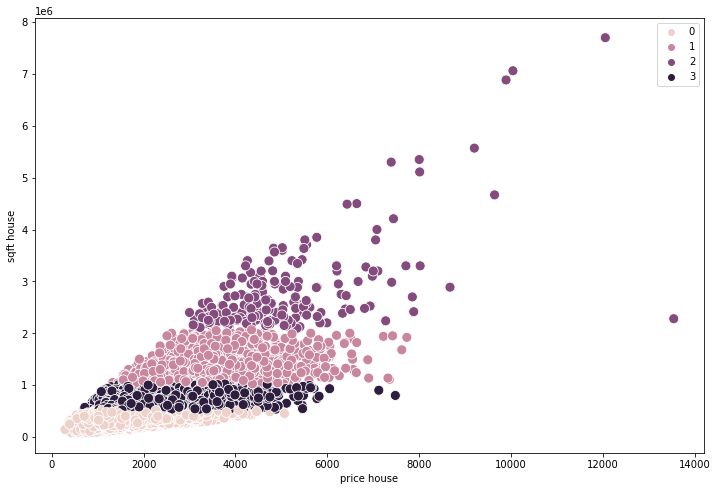

In [16]:
# And now plot it! sqft_living and price compared

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price house') # Label x-axis.
plt.ylabel('sqft house') # Label y-axis.
plt.show()

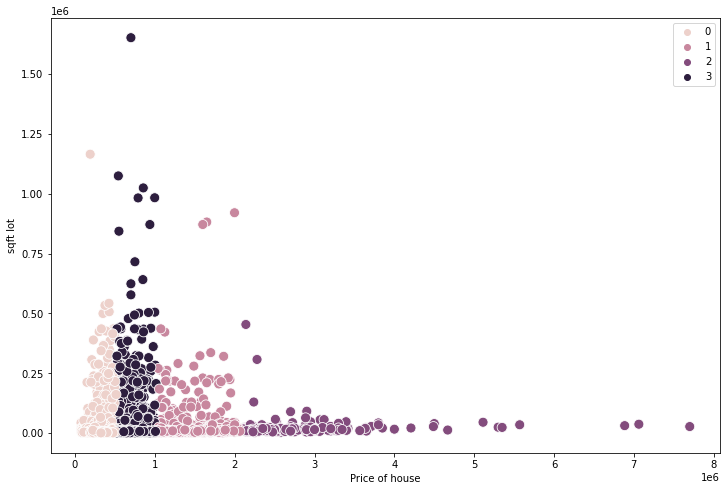

In [17]:
# Plot the clusters for the "Sqft of entire lot" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['sqft_lot'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price of house') 
plt.ylabel('sqft lot') 
plt.show()

In [18]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [19]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'sqft_living':['mean', 'median'], 
                         'sqft_lot':['mean', 'median']})

price             sqft_living              sqft_lot  \
                     mean     median         mean  median          mean   
cluster                                                                   
dark purple  6.893052e+05   660000.0  2455.921350  2400.0  18934.149587   
light pink   3.452453e+05   345000.0  1677.070203  1600.0  12051.875445   
pink         1.358833e+06  1295000.0  3632.033360  3530.0  23428.882832   
purple       2.806109e+06  2528500.0  5094.152632  4730.0  23010.052632   

                      
              median  
cluster               
dark purple   7452.5  
light pink    7500.0  
pink         10361.0  
purple       15972.0

##### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
##### Note down your thoughts in a markdown cell.

###### The clusters make sence and they only go up to 3 as we previously saw this data did best at 3. 
##### sqft_living and Price: The first cluster 0 (light pink) has very low sqft_living but as it increases the cluster 3 (dark purple) the price increases as well. As you can see there a straight line of where the increase starts. Positive relationship.
##### Sqft_lot and Price: You can see from this one there isn't a devide like there was for the last output. There isn't a strong correlation. There are houses with the 0 sqft_lot that are not high price and with same lot size very expensive.

### Grouping analysis
##### The grouping information for this data showed that sqft_lot doesn't really show any patterns. The median of the light pink is higher than the median of the pink. Same with the dark purple and purple. The correlation of the sqft_lot and price is a weak relationship.